<a href="https://colab.research.google.com/github/joelali5/form-validation/blob/master/Keras_embeddings_checked.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [240]:
!pip install tweet-preprocessor
import pandas as pd
import numpy as np
from keras.preprocessing import sequence,text
from keras.preprocessing.text import Tokenizer, one_hot
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Embedding,LSTM,Conv1D,GlobalMaxPooling1D,Flatten,MaxPooling1D,GRU,SpatialDropout1D,Bidirectional
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
# from keras.losses import categorical_crossentropy, SparseCategoricalCrossentropy
from keras.losses import BinaryCrossentropy, SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from keras.preprocessing.text import Tokenizer

from tensorflow.keras.preprocessing.sequence import pad_sequences

import os

import seaborn as sns
import re
import matplotlib.pyplot as plt

import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

from wordcloud import WordCloud, STOPWORDS

import nltk
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer

import nltk
nltk.download('stopwords')

from sklearn import metrics

from numpy import array
import preprocessor as p

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [241]:
df = pd.read_csv("/content/drive/MyDrive/train.csv")

In [279]:
REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\|)|(\()|(\))|(\[)|(\])|(\%)|(\ð)|(\$)|(\>)|(\<)|(\{)|(\})")
REPLACE_WITH_SPACE = re.compile("(<br\s/><br\s/?)|(-)|(/)|(:).")

def clean_tweets(df):
  tempArr = []
  for line in df:
    # send to tweet_processor
    tmpL = p.clean(line)
    # remove puctuation
    tmpL = REPLACE_NO_SPACE.sub("", tmpL.lower())
    tmpL = REPLACE_WITH_SPACE.sub(" ", tmpL)
    tempArr.append(tmpL)
  return tempArr

In [295]:
X = clean_tweets(df["tweet"])
y = array(df["label"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, shuffle=True, stratify=y)

In [296]:
# len(X_train), len(X_test)
len(y_train), len(y_test)

(25569, 6393)

In [297]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train + X_test)

print("Vocabulary Size : {}".format(len(tokenizer.index_word)))

max_tokens = 50
## Vectorizing data to keep max_tokens words per sample.
X_train = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=max_tokens, padding="post", truncating="post", value=0)
X_test  = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=max_tokens, padding="post", truncating="post", value=0)

print(X_train[:2])

X_train.shape, X_test.shape

Vocabulary Size : 22784
[[ 197   11   91  469   23  244  224   24  750   41  139 1141    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [  29   89   29 2682   37  769   21 2915 3548   51    6  360    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]]


((25569, 50), (6393, 50))

In [301]:
embed_len = 25
model = Sequential()
model.add(Embedding(len(tokenizer.index_word)+1, embed_len, input_length=max_tokens))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())

model.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_34 (Embedding)    (None, 50, 25)            569625    
                                                                 
 conv1d_26 (Conv1D)          (None, 46, 128)           16128     
                                                                 
 global_max_pooling1d_23 (Gl  (None, 128)              0         
 obalMaxPooling1D)                                               
                                                                 
 dense_38 (Dense)            (None, 1)                 129       
                                                                 
Total params: 585,882
Trainable params: 585,882
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_31"
_________________________________________________________________
 Layer (type)      

In [302]:
model.compile(optimizer='adam',loss = BinaryCrossentropy(from_logits=True), metrics=['accuracy'])

In [303]:
history = model.fit(X_train, y_train, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
640/640 [==============================] - 11s 16ms/step - loss: 0.2227 - accuracy: 0.9360 - val_loss: 0.1639 - val_accuracy: 0.9439
Epoch 2/5
640/640 [==============================] - 11s 16ms/step - loss: 0.1163 - accuracy: 0.9593 - val_loss: 0.1521 - val_accuracy: 0.9525
Epoch 3/5
640/640 [==============================] - 10s 16ms/step - loss: 0.0602 - accuracy: 0.9787 - val_loss: 0.1794 - val_accuracy: 0.9505
Epoch 4/5
640/640 [==============================] - 10s 16ms/step - loss: 0.0307 - accuracy: 0.9906 - val_loss: 0.2051 - val_accuracy: 0.9464
Epoch 5/5
640/640 [==============================] - 10s 15ms/step - loss: 0.0165 - accuracy: 0.9953 - val_loss: 0.2344 - val_accuracy: 0.9406


In [304]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9865
Testing Accuracy:  0.9446


In [308]:
from sklearn.metrics import accuracy_score, classification_report

# train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

test_preds = np.where(test_preds > 0.5, 1, 0)

print("Test  Accuracy : {}".format(accuracy_score(y_test, test_preds)))
print("\nClassification Report : ")
print(classification_report(y_test, test_preds))

Test  Accuracy : 0.9446269357109338

Classification Report : 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5945
           1       0.62      0.55      0.58       448

    accuracy                           0.94      6393
   macro avg       0.79      0.76      0.78      6393
weighted avg       0.94      0.94      0.94      6393



Text(33.0, 0.5, 'Truth')

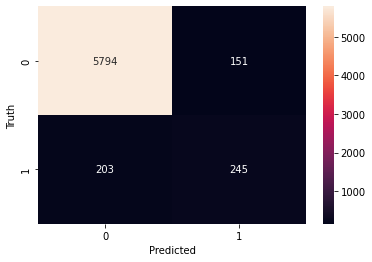

In [314]:
from sklearn.metrics import confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, test_preds)

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')